In [2]:
%load_ext autoreload
%autoreload 2
import random
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_NQueens, plot_evolution

# Local Search: Genetic Algorithm

## 1.Genrating Phrases

In this section we consider a toy problem: generating a target phrases (e.g. "genetic algorithm") from an initial polupation of random strings. Assume the length of the target is known.

Problem Formulation: 

1. Direct Representation: just strings.
2. Exponential Search Space: $m^l$ where $m$ is the size of the alphabet (set of characters in our interest) and $l$ is the length of the string.

Now that we want to solve it with GA:
1. Chromesome: directly use the string itself.
2. Fitness: how match/close an individual is to the target.
3. Mating: combine two strings in someway to generate a new one.

The following cells will walk you through this problem to show the basic idea of GA

In [2]:
# setting up the problem
target = 'Genetic Algorithm'
u_case = [chr(x) for x in range(65, 91)]
l_case = [chr(x) for x in range(97, 123)]
gene_pool = u_case + l_case + [' '] # all English chracters and white space

def init_population(pop_size, gene_pool, state_length):
    """
    Randomly initialize a population for genetic algorithm
        pop_size  :  Number of individuals in population
        gene_pool   :  List of possible values for individuals
        state_length:  The length of each individual
    """

    population = []
    for _ in range(pop_size):
        new_individual = "".join(random.choices(gene_pool, k=state_length))
        population.append(new_individual)

    return population

# test
init_pop = init_population(10, gene_pool, len(target))
init_pop

['MUDbvZHwd lqR pYM',
 'kqHECORNNhaR MKlm',
 'rHhDyGYLvSwBvYtZY',
 'UWrnhcgWeG UmnvEr',
 'XkqOdSts ruyduMWR',
 'TrjdVKnViSVj GGJy',
 'R iOiFYhNWPwRDuqF',
 'BOOKQqMqikfZdvjLt',
 'MaRNCjAUWmQYoZMFB',
 'lgissgaZnlXgSummg']

In [3]:
def fitness_fn(sample):
    # TODO: evaluate how close *sample* is to the target
    raise NotImplementedError()

# test
fitness_fn(init_pop[0])

0

In [4]:
def select(r, population, fitness_fn):
    """
    TODO: select *r* samples from *population*
    the simplest choice is to sample from *population* with each individual weighted by its fitness
    """
    raise NotImplementedError()

# test
parents = select(2, init_pop, fitness_fn)
parents

['kqHECORNNhaR MKlm', 'lgissgaZnlXgSummg']

In [5]:
def recombine(x, y):
    """
    TODO: combine two parents to produce an offspring
    """
    raise NotImplementedError()

def mutate(x, gene_pool, pmut):
    """
    apply mutation to *x* by randomly replacing one of its gene from *gene_pool*
    """
    if random.uniform(0, 1) >= pmut:
        return x

    n = len(x)
    g = len(gene_pool)
    c = random.randrange(0, n)
    r = random.randrange(0, g)

    new_gene = gene_pool[r]
    return x[:c] + new_gene + x[c + 1:]

# test
child = mutate(recombine(*parents), gene_pool, 0.1)
child

'kqHECORNNhaR MKmg'

In [6]:
# now refactor things into a *Problem* abstraction
# you can directly reuse what you have implemented above
from abc import ABC, abstractmethod

class GAProblem(ABC):
    @abstractmethod
    def init_population(self, pop_size): pass

    @abstractmethod
    def fitness(self, sample): pass

    @abstractmethod
    def reproduce(self, population): pass

    @abstractmethod
    def replacement(self, old, new): pass

class PhraseGeneration(GAProblem):
    def __init__(self, target, alphabet):
        self.target = target
        self.alphabet = alphabet

    def init_population(self, pop_size):
        # raise NotImplementedError()
        return init_population(pop_size, self.alphabet, len(self.target))

    def fitness(self, sample):
        # TODO: evaluate how close *sample* is to the target
        raise NotImplementedError()
    
    def reproduce(self, population, mutation_rate):
        """
        TODO: generate the next generation of population

        hint: make a new individual with 
        
        mutate(recombine(*select(2, population, fitness_fn)), gene_pool, pmut)

        """
        raise NotImplementedError()
    
    def replacement(self, old, new):
        """
        you can use your own strategy, for example retain some solutions from the old population
        """
        return new

def genetic_algorithm(
        problem: GAProblem, 
        ngen, n_init_size, mutation_rate, 
        log_intervel=100
    ):

    population = problem.init_population(n_init_size)
    best = max(population, key=problem.fitness)
    history = [(0, list(map(problem.fitness, population)))]

    for gen in range(ngen):
        next_gen    = problem.reproduce(population, mutation_rate)
        population  = problem.replacement(population, next_gen)

        if gen % log_intervel == 0:
            current_best = max(population, key=problem.fitness)
            if problem.fitness(current_best) > problem.fitness(best): best = current_best
            print(f"Generation: {gen}/{ngen},\tBest: {best},\tFitness={problem.fitness(best)}")         
            history.append((gen, list(map(problem.fitness, population))))
    
    history.append((ngen-1, list(map(problem.fitness, population))))
    return best, history

In [7]:
# now set up the parameters
ngen = 1200
max_population = 120
mutation_rate = 0.08

sid = 11810424 # replace this with your own sid
target = f"Genetic Algorithm by {sid}" 
alphabet = None # TODO: fix this: what is the search space now?

problem = PhraseGeneration(target, alphabet)

# and run it
solution, history = genetic_algorithm(problem, ngen, max_population, mutation_rate)
solution

Generation: 0/1000,	Best: Me6yt7CcCv2eDEJ6Hk0yILYw1GDoF,	Fitness=4
Generation: 100/1000,	Best: Me6etHc AlgoritKS by T1L1042r,	Fitness=21
Generation: 200/1000,	Best:  enetHc Algorith4 by 11w1042r,	Fitness=24
Generation: 300/1000,	Best:  enetic Algoritha by 11w1042r,	Fitness=25
Generation: 400/1000,	Best:  enetic Algoritha by 11w1042r,	Fitness=25
Generation: 500/1000,	Best: Genetic Algorithh by 11w1042c,	Fitness=26
Generation: 600/1000,	Best: Genetic Algorithm by 1181042c,	Fitness=28
Generation: 700/1000,	Best: Genetic Algorithm by 1181042c,	Fitness=28
Generation: 800/1000,	Best: Genetic Algorithm by 1181042c,	Fitness=28
Generation: 900/1000,	Best: Genetic Algorithm by 11810424,	Fitness=29


'Genetic Algorithm by 11810424'

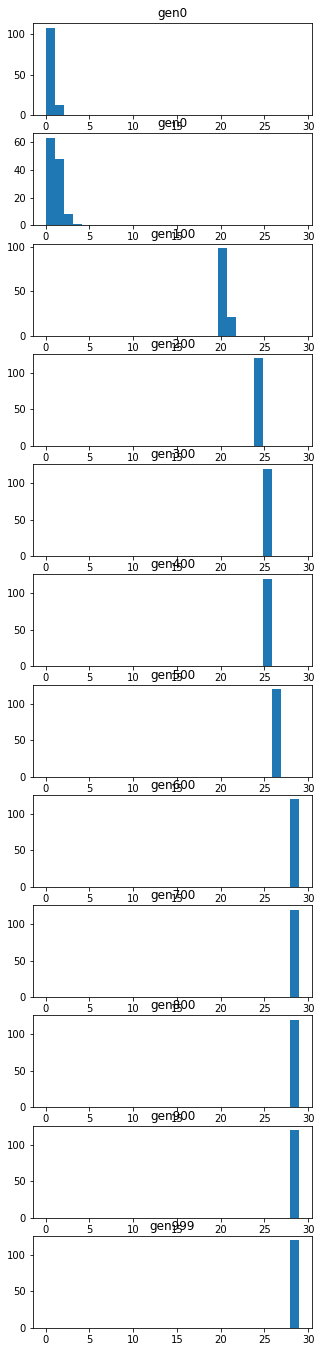

In [8]:
# visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)

## 2. N-Queens Problem

It is possible to solve the N-Queens problem with slight modifications.

For the problem:

1. Direct Representation: placement of queens.
2. Search Space: $n^n$, if we don't use any constraints.

To use GA:

Actually a new fitness function is the minimum modification you need for this problem.

Others are alomost the same as the previous problem.

In [9]:
class NQueensProblem(GAProblem):
    def __init__(self, n):
        self.n = n
        self.max_fitness =  n*(n-1)//2 # max number if non-attacking pairs

    def init_population(self, pop_size):
        raise NotImplementedError()
    
    def fitness(self, queens):
        """
        TODO

        hint: count the non-attacking pairs
        """
        raise NotImplementedError()

    def reproduce(self, population, mutation_rate):
        raise NotImplementedError()

    def replacement(self, old, new):
        return new

    def __repr__(self):
        return f"{self.n}-Queens Problem"

In [ ]:
from utils import plot_NQueens
ngen = 1000
init_size = 120
mutation_rate = 0.08

n = 8
problem = NQueensProblem(n)
solution, history = genetic_algorithm(problem, ngen, init_size, mutation_rate)

/home/xbt/0424/CS303A-fa21/local_search/utils.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


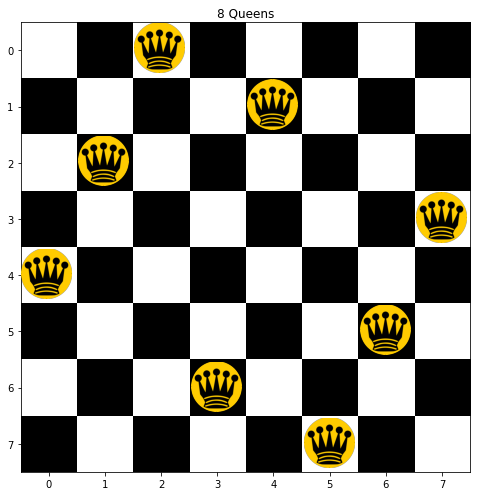

In [3]:
# example of how to use this function
# replace the parameter with your own results
plot_NQueens([4, 2, 0, 6, 1, 7, 5, 3])
# plot_NQueens(solution)

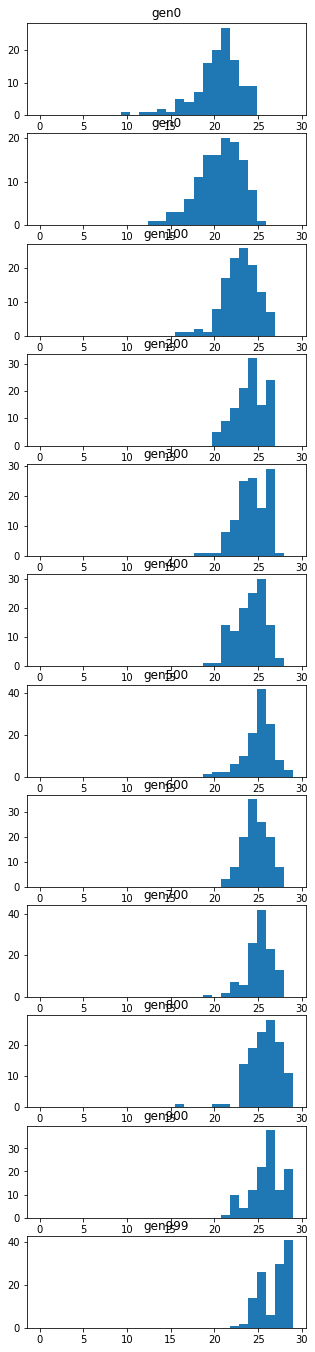

In [16]:
# visualize the evolution of the polulation
bins = np.linspace(0, problem.max_fitness, problem.max_fitness)
plot_evolution(history, bins)

## 3. TSP Problem

For the problem:

1. Representation: path permutation, e.g. (a->b->c->...->z->a)
2. Factorial Search Space: $n!$ where $n$ is the number of cities

For GA/EA:

1. How to do cross-over on paths?
3. How to apply mutation?

In [18]:
class TSP(GAProblem):
    def __init__(self, cities):
        self.cities = cities
        self.n_cities = len(cities)
    
    def init_population(self, pop_size):
        pop = [] 
        for _ in range(pop_size):
            pop.append(np.random.permutation(range(self.n_cities)).tolist())
        return pop
    
    def fitness(self, path):
        cities = self.cities[path]
        cost = np.sum(np.linalg.norm(cities - np.roll(cities, 1, axis=0), axis=1))
        return 1 / cost
    
    def reproduce(self, population, mutation_rate):
        raise NotImplementedError()

    def replacement(self, old, new):
        return new

rng = np.random.default_rng(303)
cities = rng.random((16, 2))

problem = TSP(cities)